In [1]:
%matplotlib inline

# import dependencies
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# employee database info
from config import pw
from config import user
db_loc = 'localhost:5432'
db_name = 'SQL_HW'

In [2]:
# create database connection
engine = create_engine(f"postgresql+psycopg2://{user}:{pw}@{db_loc}/{db_name}")
connection = engine.connect()

In [3]:
# read data into pandas dataframe
df_employees = pd.read_sql("SELECT * FROM employees", connection)
df_salaries = pd.read_sql("SELECT * FROM salaries", connection)
df_titles = pd.read_sql("SELECT * FROM titles", connection)

In [4]:
# salary statistics
df_salaries['salary'].describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

## Histogram for salary range

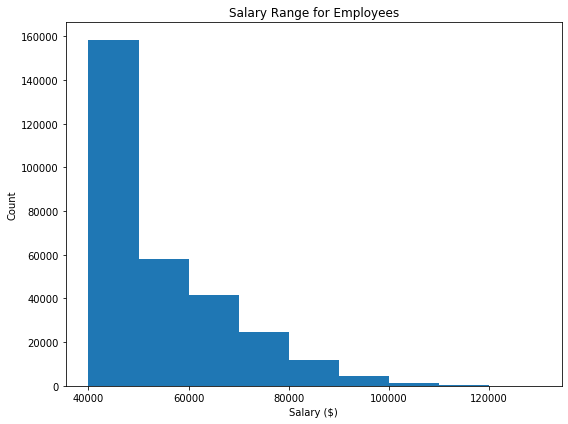

In [5]:
# histogram for salary range
fig = plt.figure(figsize=(8,6))

# bin size
bin = np.arange(math.floor(df_salaries['salary'].min()/10000)*10000,
                math.ceil(df_salaries['salary'].max()/10000)*10000 + 10000,
                10000)

# create plot
plt.hist(df_salaries['salary'], bins=bin)
plt.title('Salary Range for Employees')
plt.xlabel('Salary ($)')
plt.ylabel('Count')

# save and plot
plt.tight_layout()
plt.savefig('salary_histogram.png')
plt.show()

## Bar Chart for average salary by title

In [6]:
# merge employee, title and salary tables
df_merge = pd.merge(df_employees, df_titles, on="emp_no")
df_merge = pd.merge(df_merge, df_salaries, on="emp_no")
df_merge.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [7]:
# average salary by title
avg_salary = df_merge.groupby('title')[['salary']].mean()
avg_salary.style.format({"salary": "${:,.0f}"})

,salary
title,
Assistant Engineer,"$48,493"
Engineer,"$48,540"
Manager,"$51,531"
Senior Engineer,"$48,507"
Senior Staff,"$58,503"
Staff,"$58,465"
Technique Leader,"$48,581"


<Figure size 432x288 with 0 Axes>

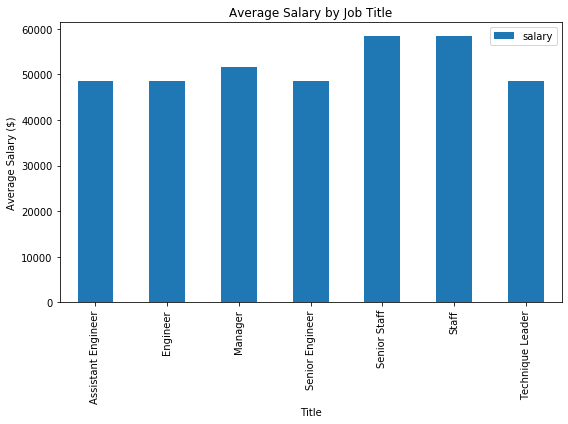

In [8]:
# bar chart
fig = plt.figure()
avg_salary.plot(kind='bar', figsize=(8,6),)
plt.title('Average Salary by Job Title')
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')

# save and show plot
plt.tight_layout()
plt.savefig('SalaryByTitle.png')
plt.show()